In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [79]:
df=pd.read_csv('/content/quikr_car.csv')
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [3]:
df.shape

(892, 6)

In [4]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [80]:
df.duplicated().sum()

94

In [74]:
df.shape

(892, 6)

In [81]:
df.drop_duplicates(inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        798 non-null    object
 1   company     798 non-null    object
 2   year        798 non-null    object
 3   Price       798 non-null    object
 4   kms_driven  748 non-null    object
 5   fuel_type   745 non-null    object
dtypes: object(6)
memory usage: 43.6+ KB


# **About the Dataset**

* Price column has object as datatype, has "Ask for price" as one of the value.
* year column has many non numeric values.
* kms_driven column have value like 80,000 kms we have to change it into 80000.
* price,kms_driven,year has datatype as object we have to change it into integer
* fuel_type column has missing values
* Name is quite big so we are taking first three words


In [24]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [82]:
df['year'].value_counts()

,count
year,
2015,93
2014,86
2013,75
2016,71
2012,63
...,...
ture,1
emi,1
able,1


In [83]:
# to rempve non numeric values from year we filter the year column
df=df[df['year'].str.isnumeric()]
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [84]:
# excluding the rows with price value as ask for price
df=df[df['Price']!='Ask For Price']
df['Price']=df['Price'].str.replace(',','')
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,"28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,"36,000 kms",Diesel
6,Ford Figo,Ford,2012,175000,"41,000 kms",Diesel


In [85]:
# making changes in values of kms_driven column
df['kms_driven']=df['kms_driven'].str.split(' ').str.get(0).str.replace(',','')
df=df[df['kms_driven'].str.isnumeric()]
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [86]:
# converting year,price,kms_driven to integer
df['year']=df['year'].astype(int)
df['Price']=df['Price'].astype(int)
df['kms_driven']=df['kms_driven'].astype(int)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 725 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        725 non-null    object
 1   company     725 non-null    object
 2   year        725 non-null    int64 
 3   Price       725 non-null    int64 
 4   kms_driven  725 non-null    int64 
 5   fuel_type   724 non-null    object
dtypes: int64(3), object(3)
memory usage: 55.8+ KB


In [88]:
df.isnull().sum()

,0
name,0
company,0
year,0
Price,0
kms_driven,0
fuel_type,1


In [89]:
# filling the missing value
df['fuel_type'].fillna(df['fuel_type'].mode()[0],inplace=True)

In [105]:
# extracting the first three words of the name column
df['name']=df['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [128]:
df.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,725,725,725.000000,7.250000e+02,725.000000,725
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,46,202,NaN,NaN,NaN,391
mean,NaN,NaN,2012.317241,4.030682e+05,46762.664828,NaN
std,NaN,NaN,4.121939,4.799854e+05,34560.157448,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.650000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.900000e+05,42000.000000,NaN
75%,NaN,NaN,2015.000000,4.899990e+05,59000.000000,NaN


In [130]:
df=df[df['Price']<6000000]

In [131]:
# after cleaning the dataset
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


# **EDA Part**

In [132]:
import plotly.express as px
fuel_type = df['fuel_type'].value_counts()
fig = px.pie(
    values=fuel_type.values,
    names=fuel_type.index,
    title='Fuel Type Distribution',
    hole=0.5,
    width=600,
    height=600,
)
fig.show()

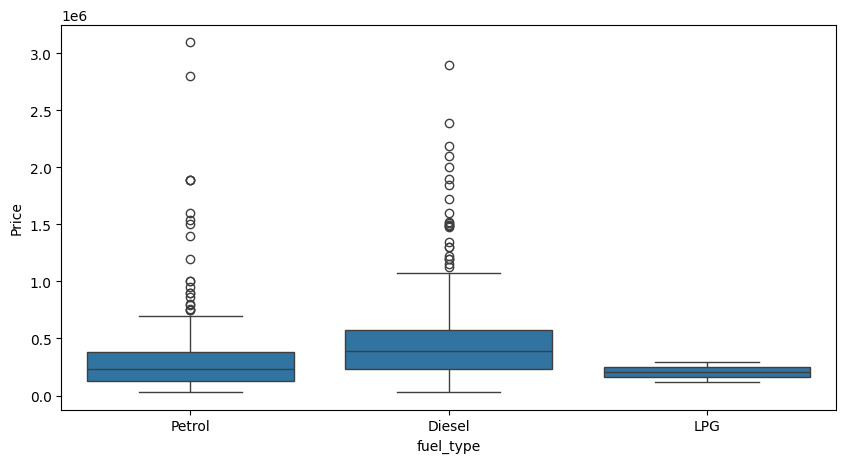

In [133]:
# fuel_type VS Price
plt.figure(figsize=(10,5))
sns.boxplot(x='fuel_type',y='Price',data=df)
plt.show()

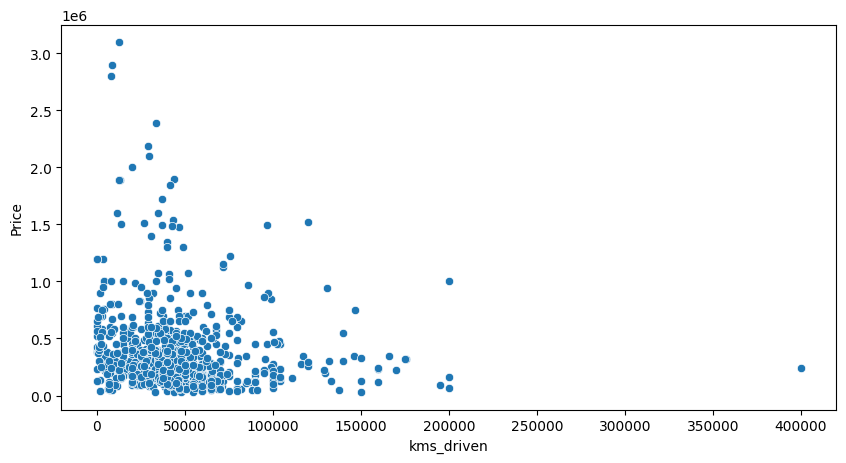

In [134]:
# kms_driven VS Price
plt.figure(figsize=(10,5))
sns.scatterplot(x='kms_driven',y='Price',data=df)
plt.show()

In [124]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [197]:
df[df['company']=='Ford']['name']

,name
4,Ford EcoSport Titanium
6,Ford Figo
8,Ford EcoSport Ambiente
83,Ford EcoSport
97,Ford Figo Diesel
106,Ford EcoSport Titanium
113,Ford Figo Diesel
134,Ford EcoSport Trend
177,Ford Fiesta
292,Ford EcoSport Titanium


In [196]:
df.to_csv('Cleaned_Car_data.csv')

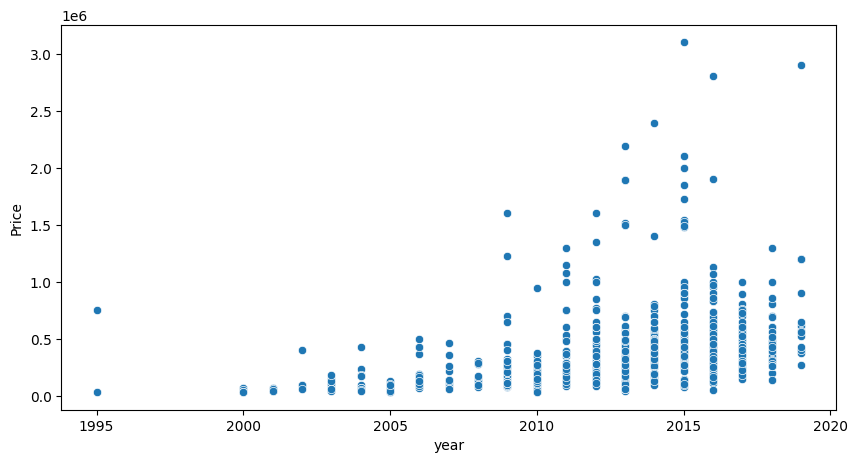

In [135]:
# Year VS Price
plt.figure(figsize=(10,5))
sns.scatterplot(x='year',y='Price',data=df)
plt.show()

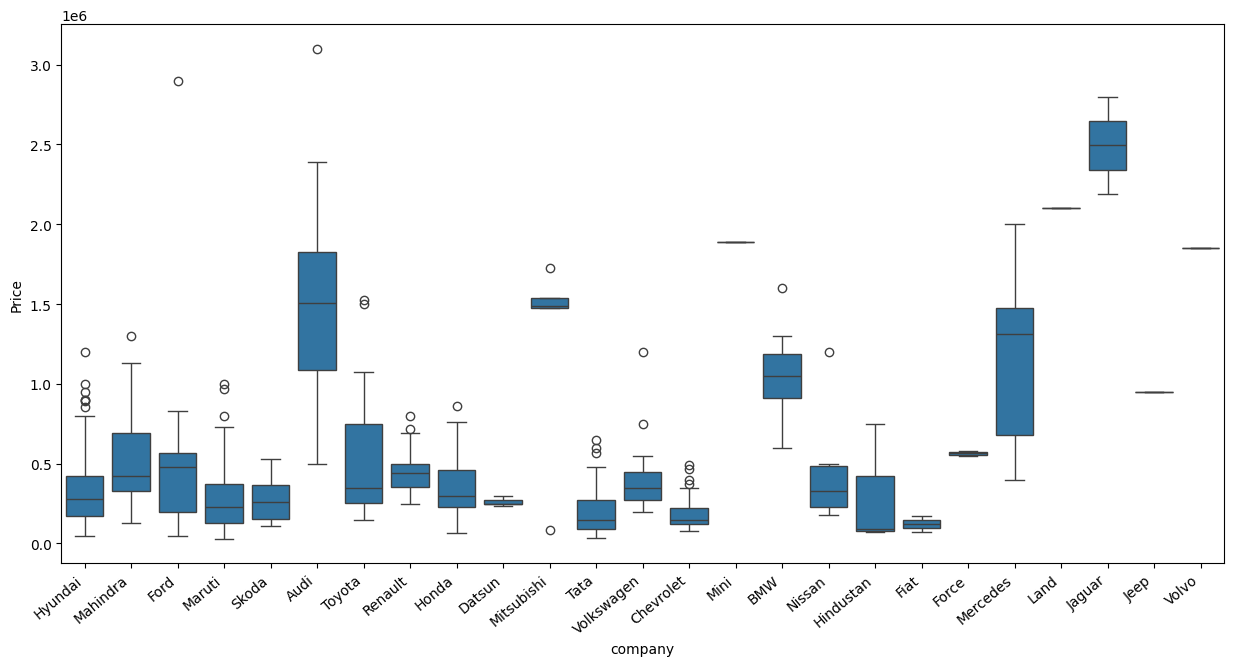

In [138]:
# name VS price
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

# **Model Buiding**

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [141]:
X=df.drop(columns='Price')
y=df['Price']

In [142]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [144]:
cat_trans=OneHotEncoder(handle_unknown='ignore')
cat_cols=['name','company','fuel_type']

preprocessor=ColumnTransformer(
    transformers=[
        ('cat',cat_trans,cat_cols),
        ],
    remainder='passthrough'
)

lr = LinearRegression()
pipe = make_pipeline(preprocessor,lr)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [145]:
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

In [146]:
r2_score(y_test,y_pred)

0.5088970737479314

In [186]:
scores=[]
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
  lr = LinearRegression()
  pipe = make_pipeline(preprocessor,lr)
  pipe.fit(X_train,y_train)
  y_pred=pipe.predict(X_test)
  scores.append(r2_score(y_test,y_pred))

In [187]:
np.argmax(scores)

604

In [188]:
scores[np.argmax(scores)]

0.8789739981113599

In [189]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([510163.73424056])

In [194]:
# the best model found
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr = LinearRegression()
pipe = make_pipeline(preprocessor,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8789739981113599

In [195]:
import pickle
pickle.dump(pipe,open('car_predict.pkl','wb'))